# Syllable Extraction

In [1]:
# Import the required libraries
# general libs
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import ast
from collections import Counter

# text related
import turkishnlp
from turkishnlp import detector
import string
import re
import multidict as multidict

# visualization
from matplotlib import pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

## Put data in a DataFrame
The data from the three tables are concatenated to for a sigle data frame

In [2]:
# call center df
df = pd.read_csv('transcriptions.csv', index_col=0)

In [3]:
# confirm data types
df.dtypes

Transcription    object
dtype: object

In [4]:
df.head()

,Transcription
0,o zamandan beri ara sıra seyyar satıcılık yapmış
1,öncelikle karşılıklı güven sağlanmalı
2,sırbistan için yeni bir yol ayrımı mı
3,festivale balkanlardan da gelenler oldu
4,grup üyesi birçok kişi tutuklandı


## Extract syllables
Syllables are extacted using the **TurkishNLP** library  
We will create a dictionary of syllables and words from our database

In [5]:
# create a syllable extraction instance
obj = detector.TurkishNLP()

In [6]:
# text from db
doc = " ".join(df.Transcription.values)
# remove punctuation and leading space
words = doc.translate(str.maketrans('', '', string.punctuation))[1:].lower()

# create the syllables from the words
syllables = obj.syllabicate_sentence(words)

# Make syllables into a sigle  long list
Syllables = [item for slb in syllables for item in slb]

## Create syllable dictionary

In [7]:
# Create a data frame for to analyse the syllables
df_syllables = pd.DataFrame()
df_syllables["Syllable"] = Counter(Syllables).keys()
df_syllables["Occurence"] = Counter(Syllables).values()

# sort based on the number of occurences of each syllable
df_syllables.sort_values(by=['Occurence'],ascending=False).reset_index(drop=True).head(50)

,Syllable,Occurence
0,la,2021
1,de,1856
2,le,1816
3,da,1563
4,ya,1464
5,bi,1437
6,a,1426
7,i,1235
8,di,1232
9,o,1180


In [8]:
# No of transcriptions available
print(f"Transcriptions: {df.shape[0]}")
print(f"Unique words: {len(Counter(words.split()).keys())}")
print(f"Unique syllables {df_syllables.shape[0]}")

Transcriptions: 3686
Unique words: 10063
Unique syllables 1644


### Use regular exressions to explore the dataframe

In [9]:
pattern = r're'
df_syllables[df_syllables.Syllable.str.contains(pattern)]

,Syllable,Occurence
95,ret,46
130,rek,329
141,re,563
215,rev,22
255,rey,14
309,rel,4
383,red,9
397,reç,7
423,rep,2
612,ren,40


# Visualization
Word clouds are created to visualize the words and syllables

## Syllable-level Word Cloud

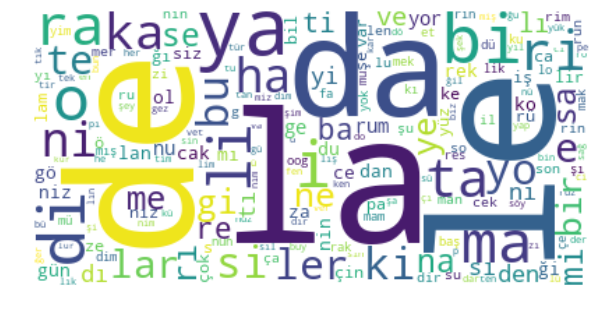

In [10]:
def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

def makeImage(text):
    
    wc = WordCloud(background_color="white")
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.figure(figsize=[10,7])
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


makeImage(getFrequencyDictForText(" ".join(Syllables)))

## Word-level word cloud

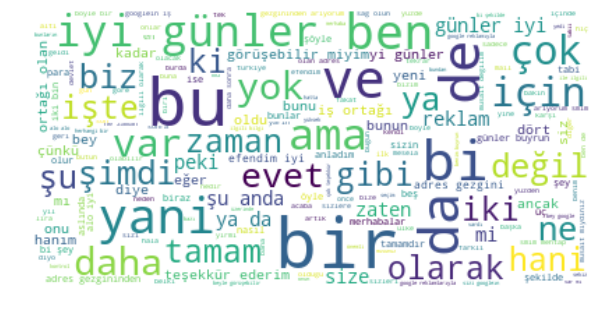

In [11]:
# Create stopword list:
# stopwords = set(STOPWORDS)
# stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, background_color="white").generate(words)

# Display the generated image:
plt.figure(figsize=[10,7])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()